In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings("ignore")

In [2]:
# path1 = './data/Loan_training_set_1_4.csv'
# path2 = './data/Loan_training_set_2_4.csv'
# path3 = './data/Loan_training_set_3_4.csv'
# path4 = './data/Loan_training_set_4_4.csv'

path1 = 'Loan_training_set_1_4.csv'
path2 = 'Loan_training_set_2_4.csv'
path3 = 'Loan_training_set_3_4.csv'
path4 = 'Loan_training_set_4_4.csv'


In [3]:
df1 = pd.read_csv(path1, skiprows = 1, sep = ',')

df1.drop(df1.tail(2).index, inplace = True)

C:\Users\Barra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df2 = pd.read_csv(path2, skiprows = 1, sep = ',')

df2.drop(df2.tail(2).index, inplace = True)

C:\Users\Barra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df3 = pd.read_csv(path3, skiprows = 1, sep = ',')

df3.drop(df3.tail(2).index, inplace = True)

C:\Users\Barra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,19,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df4 = pd.read_csv(path4, skiprows = 1, sep = ',')

df4.drop(df4.tail(2).index, inplace = True)

C:\Users\Barra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# concatenamos las tablas
df_g = pd.concat([df1, df2, df3, df4])

In [243]:
df = df_g.sample(n=500, random_state = 1789)
df.shape

(500, 151)

In [244]:
# eliminamos las variables con mas del 70% de obs con NaN
filtro_Nan = len(df) * .7
df.dropna(thresh = filtro_Nan, axis = 1, inplace = True)
df.shape

(500, 93)

In [245]:
#vemos el tipo de nuestras variables y la cantidad de NaN
df_typ = pd.merge(df.isnull().sum(axis = 0).sort_values().to_frame('NaN_values').reset_index(),
                     df.dtypes.to_frame('types').reset_index(),
                     on = 'index',
                     how = 'inner')
df_typ

,index,NaN_values,types
0,id,0,object
1,mo_sin_rcnt_tl,0,float64
2,mo_sin_rcnt_rev_tl_op,0,float64
3,mo_sin_old_rev_tl_op,0,float64
4,delinq_amnt,0,float64
5,chargeoff_within_12_mths,0,float64
6,avg_cur_bal,0,float64
7,acc_open_past_24mths,0,float64
8,total_rev_hi_lim,0,float64
9,tot_cur_bal,0,float64


In [246]:
# observamos los principales estaditicos de las variables 
round(df.describe(),3).T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,500.0,15209.600,9135.254,1000.00,7575.000,14000.000,21000.000,40000.000
funded_amnt,500.0,15209.600,9135.254,1000.00,7575.000,14000.000,21000.000,40000.000
funded_amnt_inv,500.0,15206.850,9133.558,1000.00,7575.000,14000.000,21000.000,40000.000
installment,500.0,443.766,259.346,31.33,245.805,386.385,605.068,1466.040
annual_inc,500.0,75642.329,43505.337,5000.00,47000.000,65000.000,92327.250,325000.000
dti,500.0,18.959,19.053,1.15,11.890,17.750,23.518,399.520
delinq_2yrs,500.0,0.326,0.993,0.00,0.000,0.000,0.000,10.000
fico_range_low,500.0,695.280,31.585,660.00,670.000,690.000,711.250,835.000
fico_range_high,500.0,699.280,31.585,664.00,674.000,694.000,715.250,839.000
inq_last_6mths,500.0,0.592,0.918,0.00,0.000,0.000,1.000,5.000


In [247]:
def target(x):
    if x == 'Fully Paid':
        return 1
    elif x == 'Charged Off':
        return 0
    elif x == 'In Grace Period':
        return 0
    elif x == 'Late (31-120 days)':
        return 0
    elif x == 'Late (16-30 days)':
        return 0
    elif x == 'Current':
        return 2
    elif x == 'Default':
        return 0

In [248]:
df['loan_status'] = df.loan_status.map(target)
df.loan_status.unique()

array([2, 1, 0], dtype=int64)

In [239]:
df.loan_status[(df.loan_status == 0)|(df.loan_status == 1)]

258948    1
104679    1
88237     0
23570     1
91000     0
66744     1
370306    0
371852    1
12078     1
224027    1
204784    1
110250    0
375941    1
29150     0
136668    1
197329    1
99696     1
133617    0
329440    1
92592     1
131238    1
152243    1
134373    1
260073    1
116328    0
169665    1
258309    0
354104    1
87845     1
198969    1
         ..
107162    0
321167    1
90090     1
398683    1
320929    0
160138    1
80628     0
277589    1
170992    1
159886    0
57330     1
137730    1
119388    1
122918    1
157565    1
68693     1
416321    1
91095     0
217330    1
212939    1
46562     0
225003    1
241837    1
126114    1
296269    0
45400     1
193665    1
408702    1
64855     1
43807     1
Name: loan_status, Length: 250, dtype: int64

In [249]:
df_impago = df[ (df.loan_status == 1) | (df.loan_status == 0)]
df_impago.loan_status.unique()

array([1, 0], dtype=int64)

In [250]:
cuentas = pd.DataFrame({'observaciones' : df_impago['loan_status'].value_counts(),
                       'variable' : df_impago.loan_status.unique()}).sort_values(by = 'observaciones', ascending = False)
cuentas

,observaciones,variable
1,185,1
0,65,0


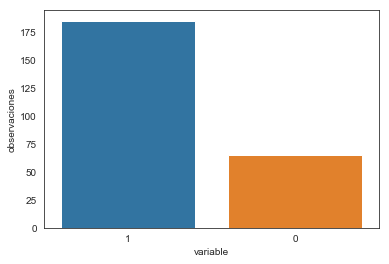

In [251]:
sns.barplot(x = cuentas.variable, y = cuentas.observaciones, order = cuentas.variable);

In [200]:
df_impago = df.sort_index(axis=1)

In [18]:
df_impago.drop(['url', 'funded_amnt', 'funded_amnt_inv'], axis = 'columns', inplace = True)

In [19]:
df_impago.shape

(500, 90)

In [20]:
df_n = df_impago.drop(['addr_state',
               'application_type',
               'disbursement_method',
               'earliest_cr_line',
               'emp_length',
               'emp_title',
               'grade',
               'hardship_flag',
               'home_ownership',
               'initial_list_status',
               'issue_d',
               'last_credit_pull_d',
               'last_pymnt_d',
               'policy_code',
               'purpose',
               'pymnt_plan',
               'pymnt_plan',
               'title',
               'verification_status',
               'debt_settlement_flag',
               'sub_grade',
               'id',
               'zip_code'], axis = 1)

In [21]:
df_n.shape

(500, 68)

In [22]:
for variable in list(df_n.columns):
    print(variable + ' --> ' + str(df_n[variable].nunique()) + ' , data type '  + str(df_n[variable].dtype))

acc_now_delinq --> 2 , data type float64
acc_open_past_24mths --> 19 , data type float64
annual_inc --> 183 , data type float64
avg_cur_bal --> 493 , data type float64
bc_open_to_buy --> 470 , data type float64
bc_util --> 376 , data type float64
chargeoff_within_12_mths --> 2 , data type float64
collection_recovery_fee --> 33 , data type float64
collections_12_mths_ex_med --> 3 , data type float64
delinq_2yrs --> 9 , data type float64
delinq_amnt --> 1 , data type float64
dti --> 460 , data type float64
fico_range_high --> 30 , data type float64
fico_range_low --> 30 , data type float64
inq_last_6mths --> 6 , data type float64
installment --> 482 , data type float64
int_rate --> 129 , data type object
last_fico_range_high --> 66 , data type float64
last_fico_range_low --> 66 , data type float64
last_pymnt_amnt --> 493 , data type float64
loan_amnt --> 169 , data type float64
loan_status --> 3 , data type int64
mo_sin_old_il_acct --> 175 , data type float64
mo_sin_old_rev_tl_op --> 250

In [23]:
df_n.select_dtypes(include=['object'])

,int_rate,revol_util,term
411370,24.99%,48.8%,60 months
258948,7.89%,77.6%,36 months
104679,13.59%,79.2%,36 months
68004,15.99%,72.3%,36 months
4614,11.99%,55.1%,60 months
88237,14.49%,86.5%,36 months
23570,8.67%,90.1%,36 months
91000,17.57%,43.1%,36 months
66744,7.99%,4.6%,36 months
62194,10.91%,32.8%,36 months


In [24]:
df_n['term'] = df_n.term.str.split(' ').str[1].astype(int)
df_n.term.head(5)

411370    60
258948    36
104679    36
68004     36
4614      60
Name: term, dtype: int32

In [25]:
df_n['revol_util'] = df_n.revol_util.str.strip('%').astype(float)
df_n.revol_util.head(5)

411370    48.8
258948    77.6
104679    79.2
68004     72.3
4614      55.1
Name: revol_util, dtype: float64

In [26]:
df_n['int_rate'] = df_n.int_rate.str.strip('%').astype(float)
df_n.int_rate.head(5)

411370    24.99
258948     7.89
104679    13.59
68004     15.99
4614      11.99
Name: int_rate, dtype: float64

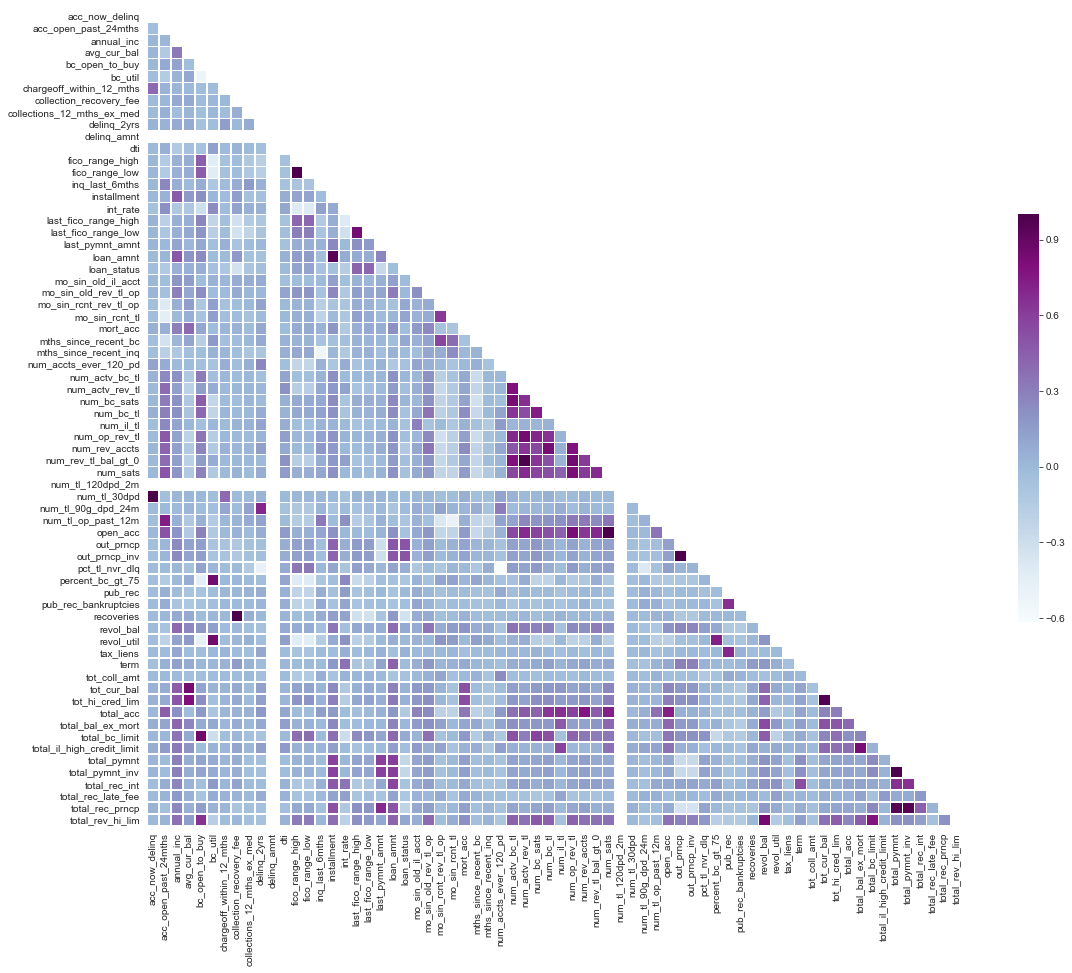

In [27]:
corr = df_n.corr()

mask = np.zeros_like(corr, dtype=np.bool) #para quitar la parte superior de la matriz 
mask[np.triu_indices_from(mask)] = True

sns.set_style(style = 'white') #para que no se vean los cuadrados que sobran 


f, ax = plt.subplots(figsize=(20, 15)) #dibujamos el lienzo 

# cmap = sns.diverging_palette(250, 700, as_cmap=True) #gama de colores que elegimos 

sns.heatmap(corr, mask=mask, cmap = 'BuPu', 
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax) ;  #es un grafico de mapa de calor

# cmap=sns.diverging_palette(250, 700, as_cmap=True), #No me coge la paleta (Marcos)

In [100]:
df_c = df_impago.loc[:,['addr_state',
               'application_type',
               'disbursement_method',
               'earliest_cr_line',
               'emp_length',
               'emp_title',
               'grade',
               'hardship_flag',
               'home_ownership',
               'initial_list_status',
               'issue_d',
               'last_credit_pull_d',
               'last_pymnt_d',
               'policy_code',
               'purpose',
               'pymnt_plan',
               'emp_title',
               'title',
               'verification_status',
               'debt_settlement_flag',
               'sub_grade',
               'id',
               'zip_code']]
# disbursement_method, earliest_cr_line, hardship_flag, initial_list_status, issue_d, last_credit_pull_d, 
# last_pymnt_d, policy_code, title, sub_grade, id, zip_code

In [101]:
# Nos quedamos solo con las categoricas que vamos a incluir en los modelos
df_c.drop(['addr_state',
               'disbursement_method',
               'earliest_cr_line',
               'hardship_flag',
               'initial_list_status',
               'issue_d',
               'last_credit_pull_d',
               'last_pymnt_d',
               'policy_code',
               'title',
               'sub_grade',
               'emp_title',
               'id',
               'zip_code'], axis = 'columns', inplace = True)

C:\Users\Barra\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [102]:
df_c.head(1)

,application_type,emp_length,grade,home_ownership,purpose,pymnt_plan,verification_status,debt_settlement_flag
411370,Individual,7 years,F,MORTGAGE,small_business,n,Source Verified,N


In [103]:
df_c['application_type'] = df_c.application_type.map(lambda x: 0 if ( x == 'Individual')  else 1)

C:\Users\Barra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
df_c.emp_length.unique()

array(['7 years', '10+ years', '2 years', '< 1 year', '5 years',
       '3 years', nan, '1 year', '4 years', '9 years', '8 years',
       '6 years'], dtype=object)

__En principio, vamos a considerar que los NaN equivalen a no trabajan/no han trabajado nunca. Les asignamos un 0 a los NaN.__

In [108]:
def años(x):
    if (x == '1 year') | (x == '2 years') | (x == '3 years') | (x == '4 years'):
        return 0
    elif (x == '5 year') | (x == '6 years') | (x == '7 years') | (x == '8 years') | (x == '9 years'):
        return 1
    elif x == '10+ years':
        return 2
#MARIO Y GON SOLO EN DOS 

In [109]:
df_c['emp_length'] = df_c.emp_length.map(años)

C:\Users\Barra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
# recordar quitar esto desde arriba
# df_c.dropna(subset = ["emp_length"], inplace=True)

In [96]:
# df_c['emp_length'] = df_c.emp_length.astype(int)

In [111]:
df_c = df_c.fillna(0)

In [112]:
df_c.emp_length.unique()

array([1., 2., 0.])

In [113]:
def riesgo(x):
    if (x == 'A') | (x == 'B') | (x == 'C'):
        return 0
    elif (x == 'D') | (x == 'E') | (x == 'F') | (x == 'G'):
        return 1

In [114]:
df_c['grade'] = df_c.grade.map(riesgo)

In [115]:
df_c.grade.unique()

array([1, 0], dtype=int64)

In [116]:
df_g.home_ownership.unique()

array(['OWN', 'MORTGAGE', 'RENT', 'ANY', 'NONE'], dtype=object)

In [117]:
def propiedad(x):
    if (x == 'OWN') | (x == 'MORTGAGE'):
        return 1
    else:
        return 0

In [118]:
df_c['home_ownership'] = df_c.home_ownership.map(propiedad)

In [119]:
df_c.home_ownership.unique()

array([1, 0], dtype=int64)

In [120]:
df_c.purpose.unique()

array(['small_business', 'debt_consolidation', 'credit_card',
       'renewable_energy', 'home_improvement', 'medical',
       'major_purchase', 'other', 'car', 'house', 'moving', 'vacation'],
      dtype=object)

In [121]:
def proposito(x):
    if (x == 'small_business') | (x == 'debt_consolidation') | (x == 'major_purchase' ) | (x == 'medical'):
        return 0
    elif (x == 'credit_card') | (x == 'home_improvement') | (x == 'house') | (x == 'car'):
        return 1
    else:
        return 2

In [122]:
df_c['purpose'] = df_c.purpose.map(proposito)

In [123]:
df_c.purpose.unique()

array([0, 1, 2], dtype=int64)

In [124]:
df_c['pymnt_plan'] = df_c.pymnt_plan.map(lambda x: 0 if (x == 'n') else 1)

In [125]:
df_c.pymnt_plan.unique()

array([0, 1], dtype=int64)

In [126]:
df_c['verification_status'] = df_c.verification_status.map(lambda x: 0 if (x == 'Not Verified') else 1)

In [127]:
df_c.verification_status.unique()

array([1, 0], dtype=int64)

In [128]:
df_c['debt_settlement_flag'] = df_c.debt_settlement_flag.map(lambda x: 0 if (x == 'N') else 1)

In [129]:
df_c.debt_settlement_flag.unique()

array([0, 1], dtype=int64)

In [130]:
df_c.head(5)

,application_type,emp_length,grade,home_ownership,purpose,pymnt_plan,verification_status,debt_settlement_flag
411370,0,1.0,1,1,0,0,1,0
258948,0,2.0,0,0,0,0,0,0
104679,0,2.0,0,1,1,0,1,0
68004,0,2.0,0,0,0,0,1,0
4614,0,0.0,0,0,1,0,1,0


### Estandarizamos e imputamos por la media/mediana los valores de las variables numéricas que vamos a utilizar

In [131]:
# X = df_n.drop('loan_status', axis=1)
# y = df_n['loan_status']

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [132]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())])

In [133]:
# numeric_features = df_n.select_dtypes(include=['int64', 'float64']).columns

# from sklearn.compose import ColumnTransformer

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features)])

In [134]:
# from sklearn.ensemble import RandomForestClassifier

# rf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', RandomForestClassifier())])

In [135]:
df_n.shape

(500, 68)

In [136]:
df_c = df_c.astype('object')

In [137]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 411370 to 84252
Data columns (total 8 columns):
application_type        500 non-null object
emp_length              500 non-null object
grade                   500 non-null object
home_ownership          500 non-null object
purpose                 500 non-null object
pymnt_plan              500 non-null object
verification_status     500 non-null object
debt_settlement_flag    500 non-null object
dtypes: object(8)
memory usage: 35.2+ KB


In [138]:
df_unido = pd.DataFrame(pd.concat([df_n, df_c], axis = 1))

In [139]:
df_unido.to_csv('df_unido.csv', sep=',')

In [140]:
df_n_sin_loan = df_n.drop('loan_status', axis=1)

In [141]:
df_unido.head(12)

,acc_now_delinq,acc_open_past_24mths,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,...,total_rec_prncp,total_rev_hi_lim,application_type,emp_length,grade,home_ownership,purpose,pymnt_plan,verification_status,debt_settlement_flag
411370,0.0,10.0,223000.0,6041.0,15589.0,55.7,0.0,0.000,0.0,0.0,...,15132.36,55600.0,0,1,1,1,0,0,1,0
258948,0.0,0.0,96000.0,5627.0,3759.0,77.6,0.0,0.000,0.0,1.0,...,11200.00,16800.0,0,2,0,0,0,0,0,0
104679,0.0,3.0,97000.0,2482.0,1558.0,93.5,0.0,0.000,0.0,0.0,...,20000.00,28200.0,0,2,0,1,1,0,1,0
68004,0.0,3.0,70000.0,6006.0,5834.0,74.5,0.0,0.000,0.0,0.0,...,2783.17,23600.0,0,2,0,0,0,0,1,0
4614,0.0,2.0,46000.0,2823.0,20790.0,65.3,0.0,0.000,0.0,0.0,...,11117.54,71700.0,0,0,0,0,1,0,1,0
88237,0.0,1.0,300000.0,18260.0,955.0,97.3,0.0,319.815,0.0,1.0,...,16587.55,53000.0,0,0,0,0,0,0,1,0
23570,0.0,3.0,115000.0,33325.0,577.0,87.2,0.0,0.000,0.0,0.0,...,8000.00,8000.0,0,2,0,1,0,0,0,0
91000,0.0,1.0,32000.0,2478.0,3982.0,50.2,0.0,0.000,0.0,0.0,...,2469.84,10500.0,0,0,1,0,0,0,1,0
66744,0.0,2.0,36000.0,2697.0,5916.0,4.6,0.0,0.000,0.0,0.0,...,1000.00,6200.0,0,0,0,0,0,0,0,0
62194,0.0,1.0,82000.0,2353.0,18988.0,33.1,0.0,0.000,0.0,1.0,...,459.46,28700.0,0,0,0,0,2,0,1,0


In [162]:
X = df_unido.drop('loan_status', axis=1)
y = df_unido['loan_status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [163]:
# X_train.shape
# X_test.shape
y_train = pd.DataFrame(y_train) #Para que salgan bien (no deja hacer reshape en series)
y_test = pd.DataFrame(y_test)

In [164]:
# y_train.shape
y_test.shape
X_train.shape

(400, 75)

In [165]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [166]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = 'missing'))])    
categorical_features = X_train.select_dtypes(include=['object']).columns

In [167]:
numeric_transformer

Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))])

In [168]:
numeric_features = df_unido.select_dtypes(include=['int64', 'float64']).columns

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [172]:
df_unido_escalado = pd.DataFrame(preprocessor.fit_transform(df_unido), columns = X_train.columns)

In [150]:
round(df_unido_escalado.describe(), 2)

,acc_now_delinq,acc_open_past_24mths,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,...,total_rec_prncp,total_rev_hi_lim,application_type,emp_length,grade,home_ownership,purpose,pymnt_plan,verification_status,debt_settlement_flag
count,500.00,500.00,500.00,500.00,500.00,500.0,500.00,500.00,500.00,500.00,...,500.00,500.0,500,500.0,500,500,500,500,500,500
unique,2.00,19.00,183.00,493.00,471.00,377.0,2.00,33.00,3.00,9.00,...,397.00,362.0,2,3.0,2,2,3,2,2,2
top,-0.04,-0.45,-0.36,-0.67,-0.59,1.2,-0.11,-0.17,-0.17,-0.33,...,0.81,-0.6,0,0.0,0,1,0,0,1,0
freq,499.00,72.00,24.00,2.00,18.00,5.0,494.00,468.00,485.00,408.00,...,13.00,5.0,485,237.0,376,291,306,499,353,498


In [154]:
df_unido_escalado.to_csv('df_unido_escalado.csv', sep=',')

In [155]:
df_unido_escalado.emp_length.isnull().sum()

0

In [157]:
df_unido_escalado.total_pymnt.isnull().sum()

0

In [170]:
X_train.columns.unique()

Index(['acc_now_delinq', 'acc_open_past_24mths', 'annual_inc', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs',
       'delinq_amnt', 'dti', 'fico_range_high', 'fico_range_low',
       'inq_last_6mths', 'installment', 'int_rate', 'last_fico_range_high',
       'last_fico_range_low', 'last_pymnt_amnt', 'loan_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'open_acc', 'out_prncp', 'out_prncp_inv',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies',
  

In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_unido_escalado, test_size=0.2)

In [179]:
X_train.to_csv('X_train.csv', sep=',')

In [180]:
X_test.to_csv('X_test.csv', sep=',')

In [184]:
y_test

,loan_status
273500,2
12667,0
170992,1
117066,2
7198,2
231744,0
4233,1
136513,1
92125,2
59218,1
